In [7]:
import pandas as pd

In [8]:
train = pd.read_csv("train.csv")

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
train["datetime"]=pd.to_datetime(train["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
#data type of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [12]:
#no. of rows
print("Rows", len(train))

Rows 10886


In [13]:
#Missing values
print("Missing Values", train.isna().sum())

Missing Values datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [14]:
#Year
train["year"]= train["datetime"].dt.year

In [15]:
#Month
train["month"]=train["datetime"].dt.month

In [16]:
#Day
train["weekday"]=train["datetime"].dt.day_name()

In [17]:
#Hour
train["hour"]=train["datetime"].dt.hour

In [18]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,Saturday,4


In [19]:
#Season Mapping
season_map={1: "Spring", 2: "Summer", 3:"Fall", 4: "Winter"}
train['season']=train['season'].map(season_map)

In [20]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,Saturday,4


In [21]:
#Summing up casual and registered bikes
train.groupby("year")[["casual","registered"]].sum()

,casual,registered
year,,
2011,155817,626162
2012,236318,1067179


In [22]:
#mean of the hourly total rentals count by season

season_mean=train.groupby("season")["count"].mean()
print(season_mean)
print("\nHighest", season_mean.idxmax())

season
Fall      234.417124
Spring    116.343261
Summer    215.251372
Winter    198.988296
Name: count, dtype: float64

Highest Fall


In [23]:
# Create working day analysis
working_analysis = train.groupby(['workingday', 'year'])[['registered', 'casual']].mean()

print("Mean rentals by working day and year:")
print(working_analysis)

registered_comparison = train.groupby('workingday')['registered'].mean()
print(f"\nRegistered users - Working days: {registered_comparison[1]:.1f}")
print(f"Registered users - Non-working days: {registered_comparison[0]:.1f}")

casual_comparison = train.groupby('workingday')['casual'].mean()
print(f"Casual users - Working days: {casual_comparison[1]:.1f}")
print(f"Casual users - Non-working days: {casual_comparison[0]:.1f}")

Mean rentals by working day and year:
                 registered     casual
workingday year                       
0          2011   97.153132  48.201276
           2012  160.767429  70.250286
1          2011  124.031909  19.664143
           2012  211.587507  30.527733

Registered users - Working days: 167.9
Registered users - Non-working days: 129.2
Casual users - Working days: 25.1
Casual users - Non-working days: 59.3


In [24]:
#Weather analysis

weather_map = {
    1: 'Clear/Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Storm'
}
train['weather_desc'] = train['weather'].map(weather_map)

weather_means = train.groupby('weather')['count'].mean()
weather_means_desc = train.groupby('weather_desc')['count'].mean()

print("Weather vs Average Hourly Rentals:")
print(weather_means_desc.sort_values(ascending=False))

print(f"\nHighest: {weather_means_desc.idxmax()} ({weather_means_desc.max():.1f})")
print(f"Lowest: {weather_means_desc.idxmin()} ({weather_means_desc.min():.1f})")

Weather vs Average Hourly Rentals:
weather_desc
Clear/Cloudy        205.236791
Mist/Cloudy         178.955540
Heavy Rain/Storm    164.000000
Light Rain/Snow     118.846333
Name: count, dtype: float64

Highest: Clear/Cloudy (205.2)
Lowest: Light Rain/Snow (118.8)


In [25]:
#Correlation analysis
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

correlation_matrix = train[numerical_cols].corr()

count_correlations = correlation_matrix['count'].sort_values(ascending=False)
print("Correlations with Total Rentals (count):")
print(count_correlations)

print(f"\nHighest correlation: {count_correlations.index[1]} (r = {count_correlations.iloc[1]:.3f})")

Correlations with Total Rentals (count):
count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
windspeed     0.101369
humidity     -0.317371
Name: count, dtype: float64

Highest correlation: registered (r = 0.971)


In [26]:
#Create day_period column

def create_day_period(hour):
    if 0 <= hour <= 6:
        return 'night'
    elif 6 < hour <= 12:
        return 'morning'
    elif 12 < hour <= 18:  # Fixed: was 12-6 (should be 12-18)
        return 'afternoon'
    else:  # 18-24
        return 'evening'

train['day_period'] = train['hour'].apply(create_day_period)

print("Day period distribution:")
print(train['day_period'].value_counts().sort_index())

Day period distribution:
day_period
afternoon    2736
evening      2280
morning      2731
night        3139
Name: count, dtype: int64


In [27]:
#Pivot table for day_period vs workingday

pivot_table = train.pivot_table(
    values='count',
    index='day_period',
    columns='workingday',
    aggfunc='mean'
).round(1)

print("Mean Hourly Rentals by Day Period and Working Day:")
print(pivot_table)

# Add labels for better readability
pivot_table.columns = ['Non-Working', 'Working']
print("\nFormatted:")
print(pivot_table)

Mean Hourly Rentals by Day Period and Working Day:
workingday      0      1
day_period              
afternoon   356.5  315.6
evening     157.8  202.2
morning     217.6  250.5
night        40.6   28.8

Formatted:
            Non-Working  Working
day_period                      
afternoon         356.5    315.6
evening           157.8    202.2
morning           217.6    250.5
night              40.6     28.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
Rows 10886
Missing Values datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity 

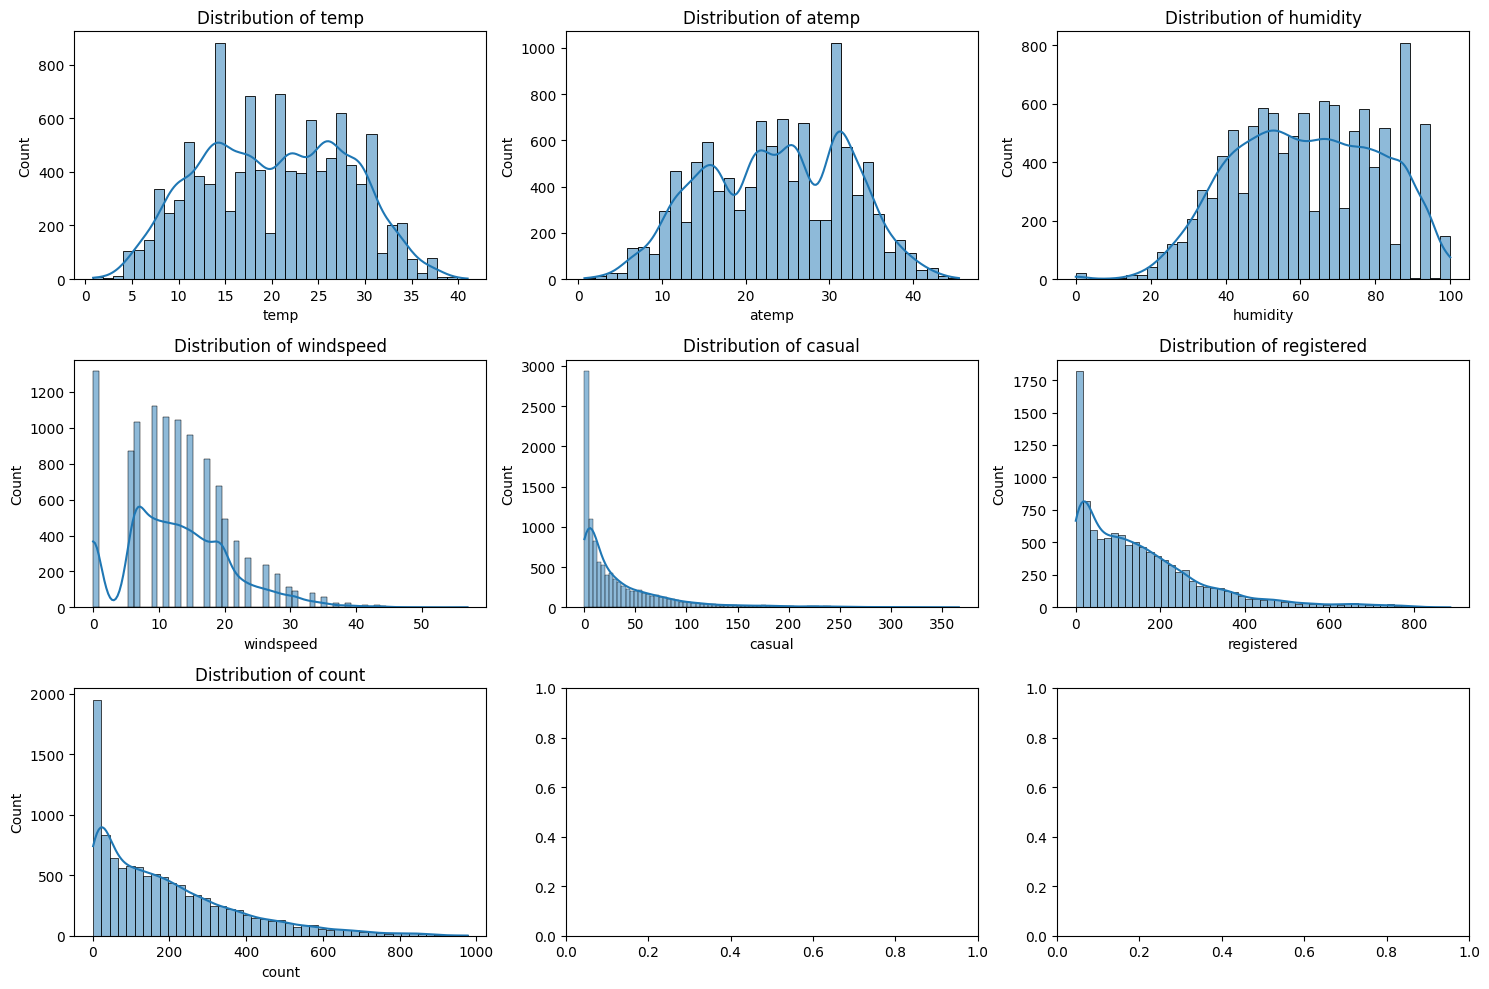

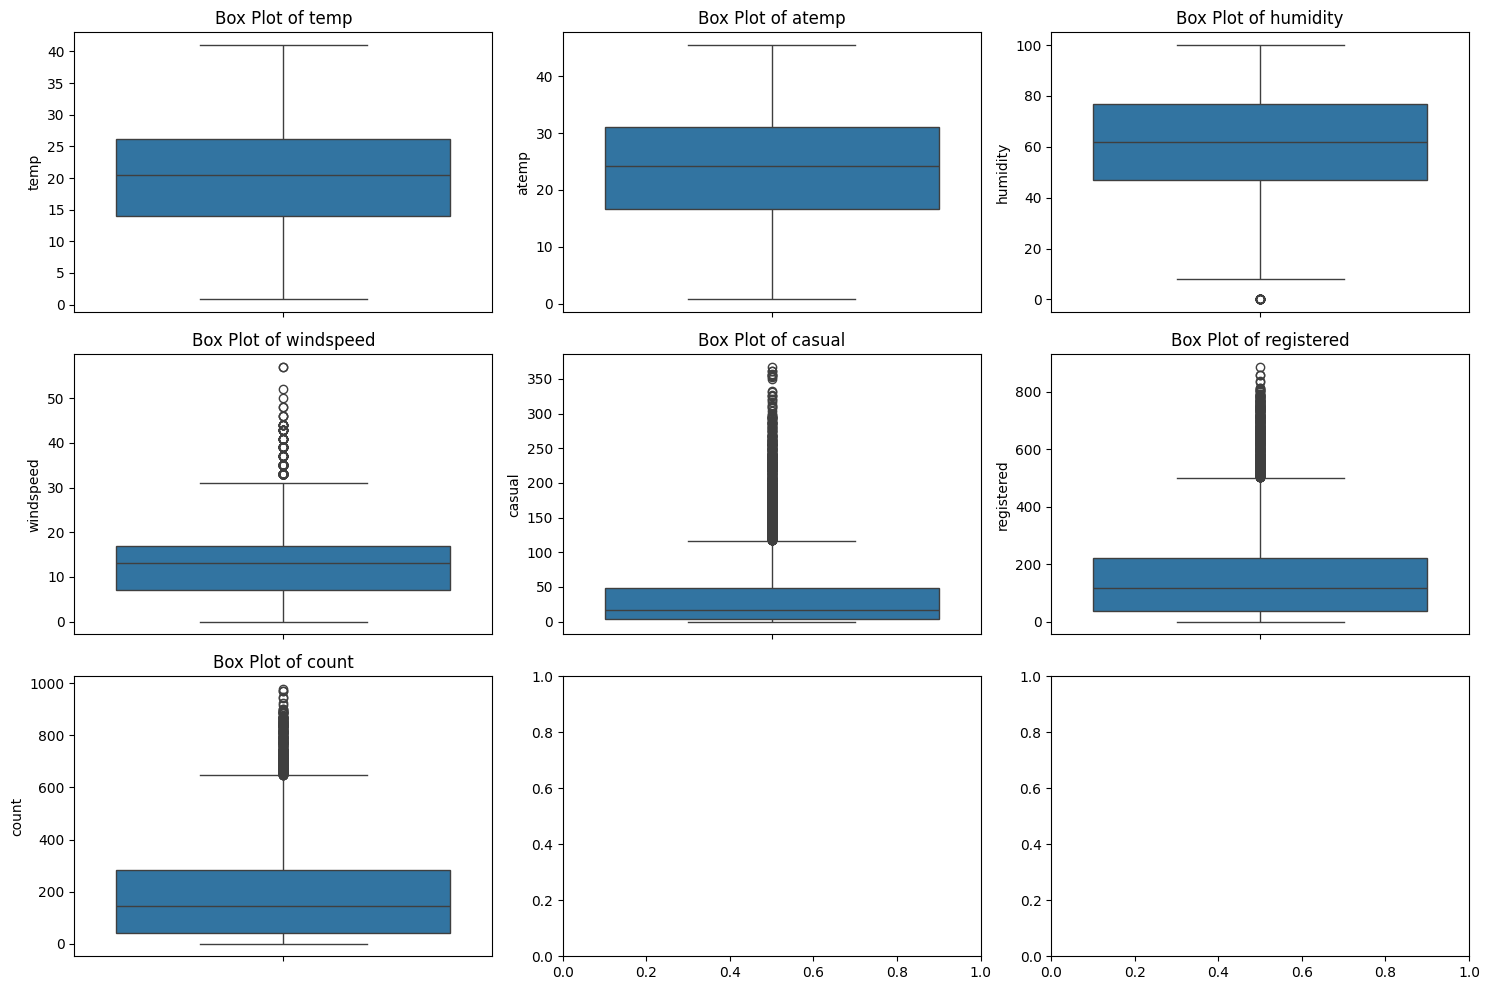

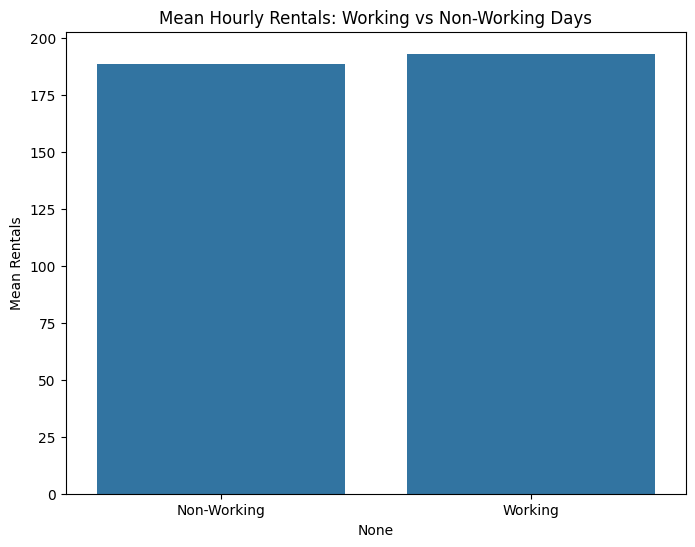

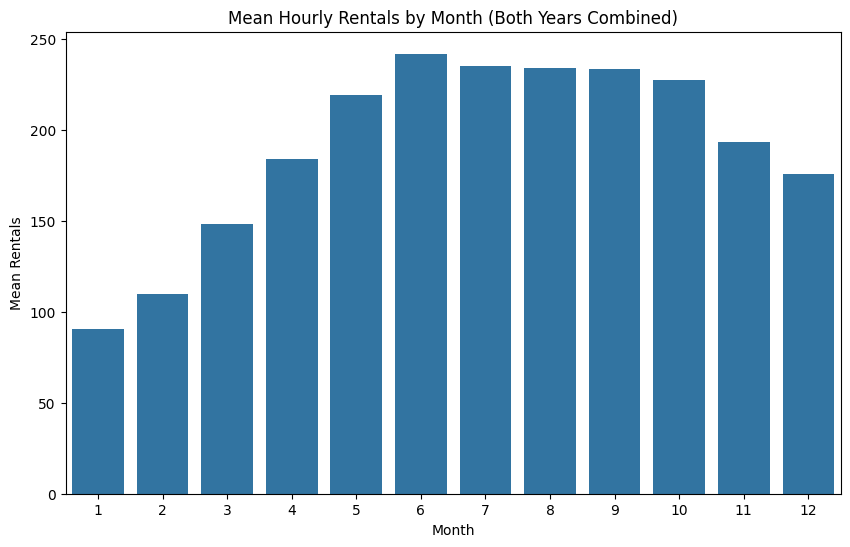

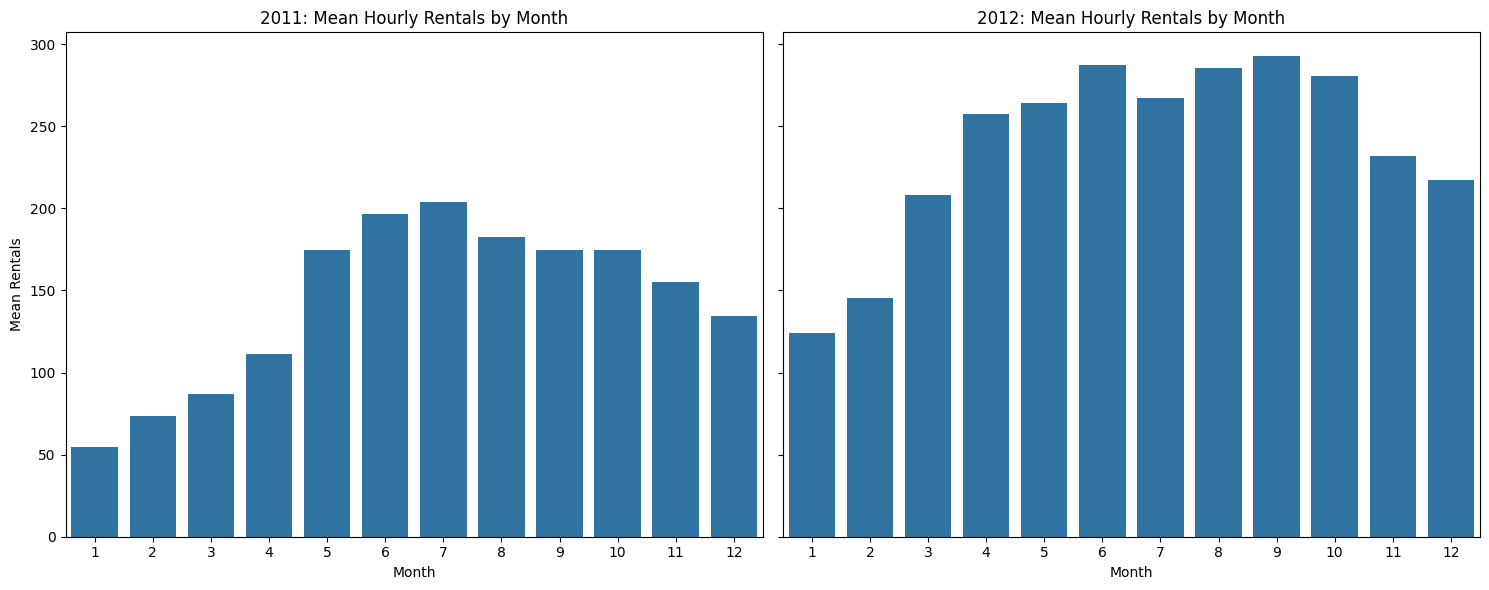

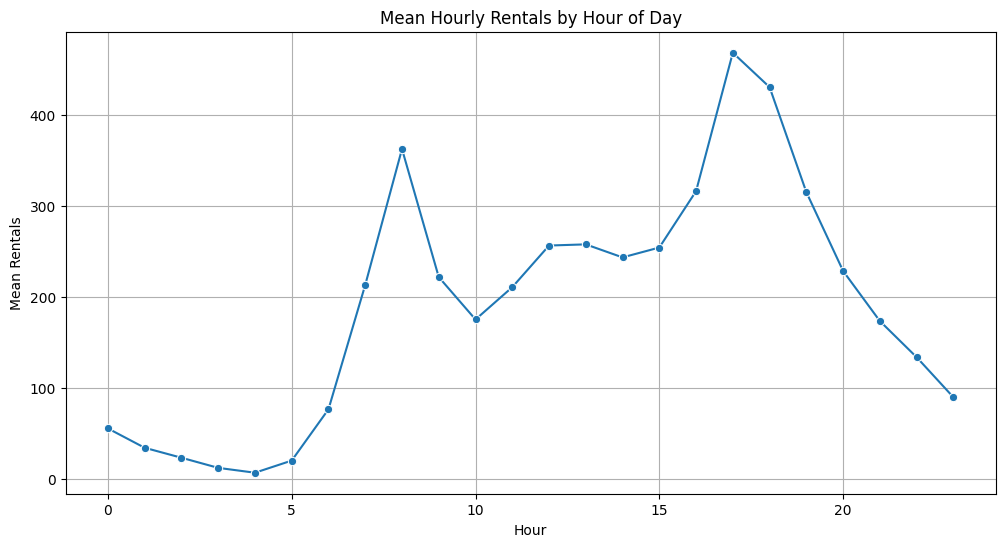

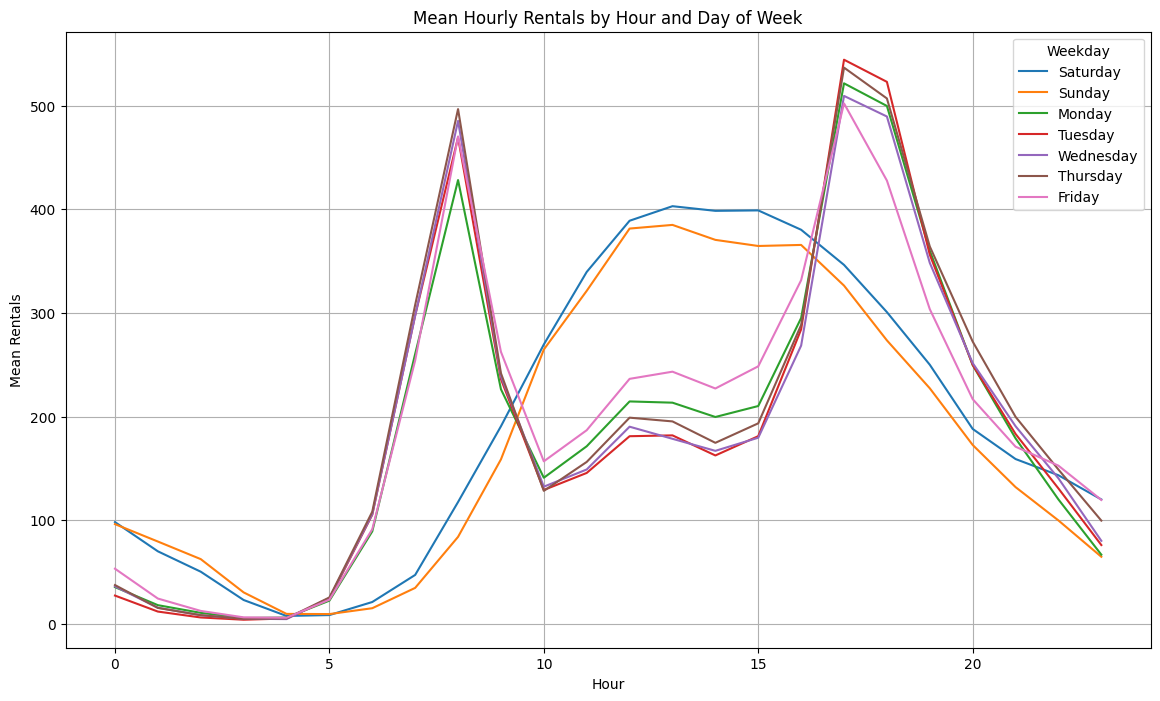

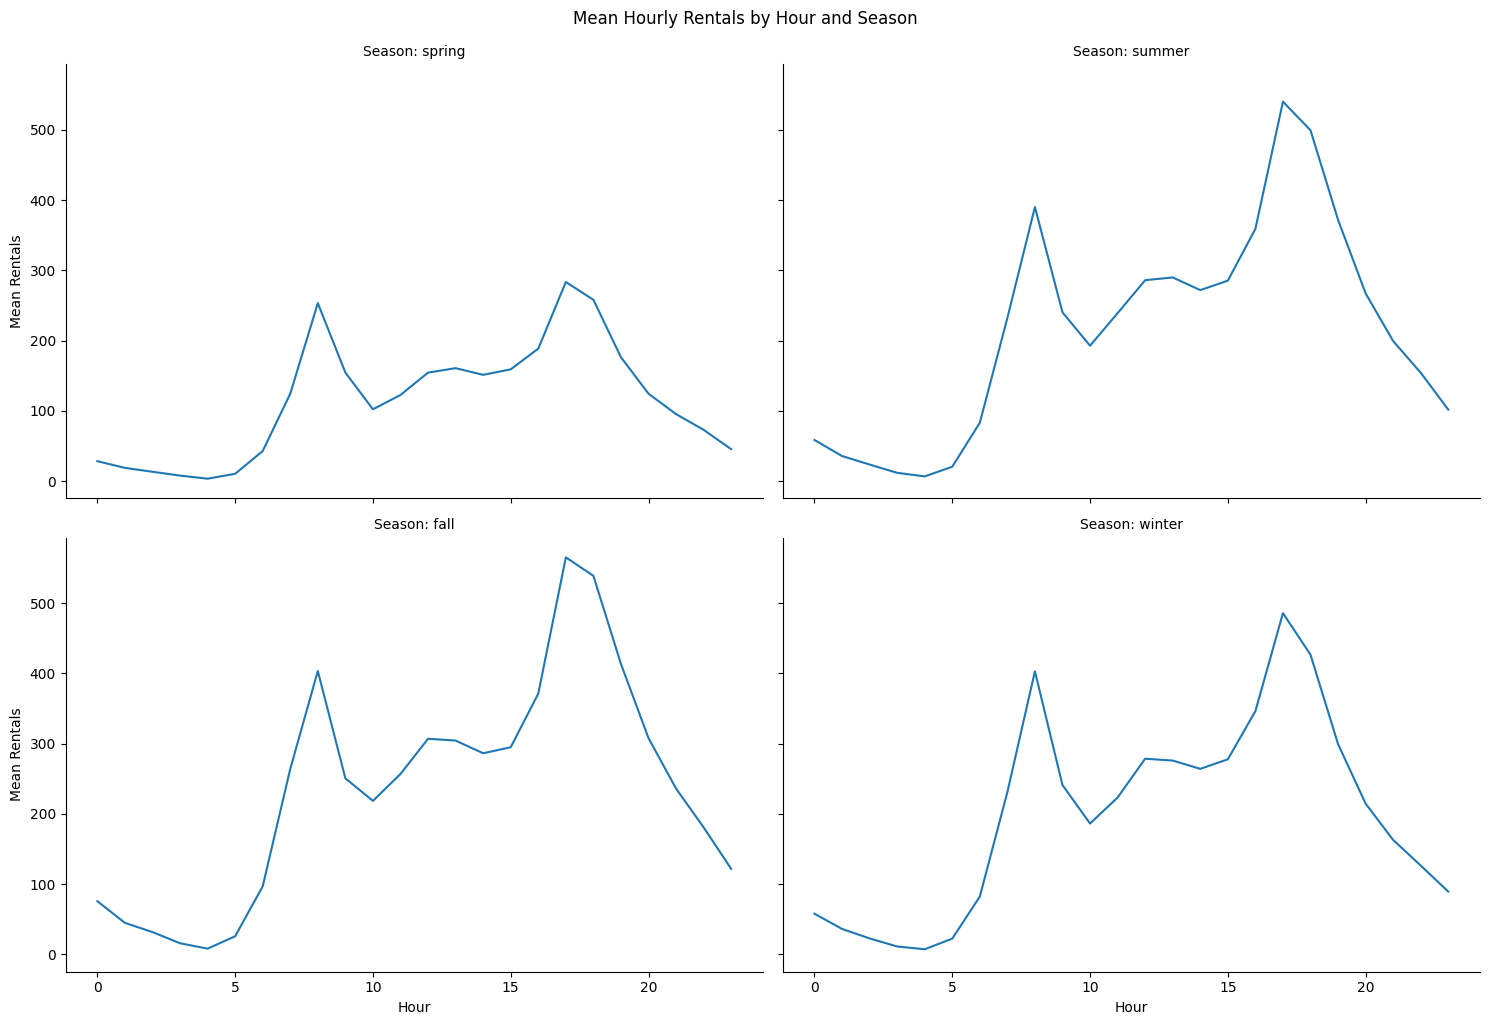

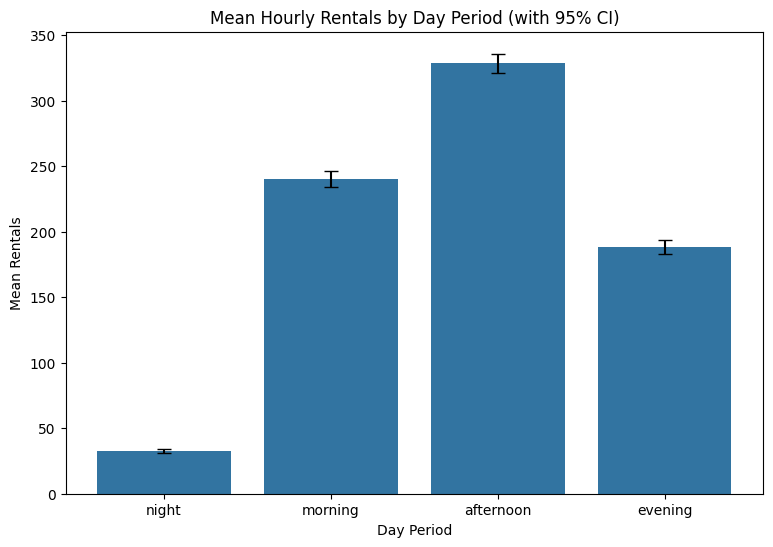

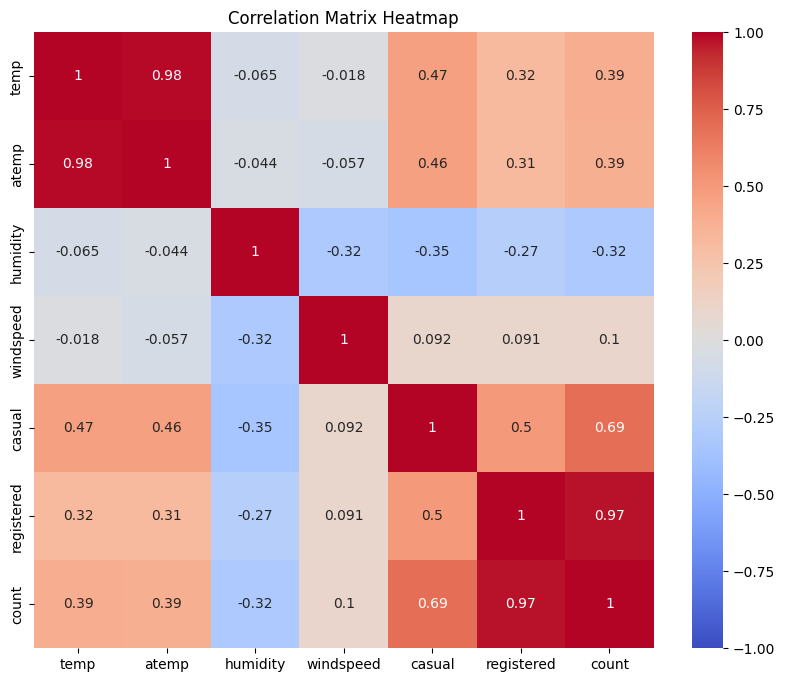

In [28]:
import pandas as pd
train = pd.read_csv("train.csv")
train.head()
train["datetime"]=pd.to_datetime(train["datetime"])
train.head()
#data type of each column
train.info()
#no. of rows
print("Rows", len(train))
#Missing values
print("Missing Values", train.isna().sum())
#Year
train["year"]= train["datetime"].dt.year
#Month
train["month"]=train["datetime"].dt.month
#Day
train["weekday"]=train["datetime"].dt.day_name()
#Hour
train["hour"]=train["datetime"].dt.hour
train.head()
#Season Mapping
season_map={1: "Spring", 2: "Summer", 3:"Fall", 4: "Winter"}
train['season']=train['season'].map(season_map)
train.head()
#Summing up casual and registered bikes
train.groupby("year")[["casual","registered"]].sum()
#mean of the hourly total rentals count by season

season_mean=train.groupby("season")["count"].mean()
print(season_mean)
print("\nHighest", season_mean.idxmax())
# Create working day analysis
working_analysis = train.groupby(['workingday', 'year'])[['registered', 'casual']].mean()

print("Mean rentals by working day and year:")
print(working_analysis)

registered_comparison = train.groupby('workingday')['registered'].mean()
print(f"\nRegistered users - Working days: {registered_comparison[1]:.1f}")
print(f"Registered users - Non-working days: {registered_comparison[0]:.1f}")

casual_comparison = train.groupby('workingday')['casual'].mean()
print(f"Casual users - Working days: {casual_comparison[1]:.1f}")
print(f"Casual users - Non-working days: {casual_comparison[0]:.1f}")
#Weather analysis

weather_map = {
    1: 'Clear/Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Storm'
}
train['weather_desc'] = train['weather'].map(weather_map)

weather_means = train.groupby('weather')['count'].mean()
weather_means_desc = train.groupby('weather_desc')['count'].mean()

print("Weather vs Average Hourly Rentals:")
print(weather_means_desc.sort_values(ascending=False))

print(f"\nHighest: {weather_means_desc.idxmax()} ({weather_means_desc.max():.1f})")
print(f"Lowest: {weather_means_desc.idxmin()} ({weather_means_desc.min():.1f})")
#Correlation analysis
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

correlation_matrix = train[numerical_cols].corr()

count_correlations = correlation_matrix['count'].sort_values(ascending=False)
print("Correlations with Total Rentals (count):")
print(count_correlations)

print(f"\nHighest correlation: {count_correlations.index[1]} (r = {count_correlations.iloc[1]:.3f})")
#Create day_period column

def create_day_period(hour):
    if 0 <= hour <= 6:
        return 'night'
    elif 6 < hour <= 12:
        return 'morning'
    elif 12 < hour <= 18:  # Fixed: was 12-6 (should be 12-18)
        return 'afternoon'
    else:  # 18-24
        return 'evening'

train['day_period'] = train['hour'].apply(create_day_period)

print("Day period distribution:")
print(train['day_period'].value_counts().sort_index())
#Pivot table for day_period vs workingday

pivot_table = train.pivot_table(
    values='count',
    index='day_period',
    columns='workingday',
    aggfunc='mean'
).round(1)

print("Mean Hourly Rentals by Day Period and Working Day:")
print(pivot_table)

# Add labels for better readability
pivot_table.columns = ['Non-Working', 'Working']
print("\nFormatted:")
print(pivot_table)
#Assignment 3.2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    sns.histplot(train[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=train[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()
working_means = train.groupby('workingday')['count'].mean().round(1)
working_means.index = ['Non-Working', 'Working']

plt.figure(figsize=(8, 6))
sns.barplot(x=working_means.index, y=working_means.values)
plt.title('Mean Hourly Rentals: Working vs Non-Working Days')
plt.ylabel('Mean Rentals')
plt.show()
monthly_means = train.groupby('month')['count'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_means.index, y=monthly_means.values)
plt.title('Mean Hourly Rentals by Month (Both Years Combined)')
plt.xlabel('Month')
plt.ylabel('Mean Rentals')
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# 2011
monthly_2011 = train[train['year'] == 2011].groupby('month')['count'].mean()
sns.barplot(x=monthly_2011.index, y=monthly_2011.values, ax=axes[0])
axes[0].set_title('2011: Mean Hourly Rentals by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Mean Rentals')

# 2012
monthly_2012 = train[train['year'] == 2012].groupby('month')['count'].mean()
sns.barplot(x=monthly_2012.index, y=monthly_2012.values, ax=axes[1])
axes[1].set_title('2012: Mean Hourly Rentals by Month')
axes[1].set_xlabel('Month')

plt.tight_layout()
plt.show()
hourly_means = train.groupby('hour')['count'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_means.index, y=hourly_means.values, marker='o')
plt.title('Mean Hourly Rentals by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Mean Rentals')
plt.grid(True)
plt.show()
train = pd.read_csv("train.csv", parse_dates=["datetime"])

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour
train["weekday"] = train["datetime"].dt.day_name()

season_map = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
train["season"] = train["season"].map(season_map)
plt.figure(figsize=(14, 8))
sns.lineplot(data=train, x='hour', y='count', hue='weekday', estimator='mean', errorbar=None)
plt.title('Mean Hourly Rentals by Hour and Day of Week')
plt.xlabel('Hour')
plt.ylabel('Mean Rentals')
plt.grid(True)
plt.legend(title='Weekday')
plt.show()
g = sns.FacetGrid(train, col='season', col_wrap=2, height=5, aspect=1.5)
g.map(sns.lineplot, 'hour', 'count', estimator='mean', errorbar=None)
g.set_titles('Season: {col_name}')
g.set_axis_labels('Hour', 'Mean Rentals')
g.fig.suptitle('Mean Hourly Rentals by Hour and Season', y=1.02)
plt.show()
def create_day_period(hour):
    if 0 <= hour <= 6:
        return 'night'
    elif 6 < hour <= 12:
        return 'morning'
    elif 12 < hour <= 18:
        return 'afternoon'
    else:
        return 'evening'

train['day_period'] = train['hour'].apply(create_day_period)
period_group = train.groupby('day_period')['count']

means = period_group.mean()

# Manual 95% CI calculation
ci = period_group.apply(lambda x: stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=stats.sem(x)))

ci_lower = pd.Series([c[0] for c in ci], index=means.index)
ci_upper = pd.Series([c[1] for c in ci], index=means.index)

# Logical order for day periods
order = ['night', 'morning', 'afternoon', 'evening']
means = means.reindex(order)
ci_lower = ci_lower.reindex(order)
ci_upper = ci_upper.reindex(order)

# Plot
plt.figure(figsize=(9, 6))
sns.barplot(x=means.index, y=means.values)
plt.errorbar(x=means.index, y=means.values,
             yerr=[means - ci_lower, ci_upper - means],
             fmt='none', capsize=5, color='black')
plt.title('Mean Hourly Rentals by Day Period (with 95% CI)')
plt.xlabel('Day Period')
plt.ylabel('Mean Rentals')
plt.show()
corr_matrix = train[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
pip install streamlit


2026-01-19 23:00:52.878 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 23:00:52.880 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 23:00:53.003 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-01-19 23:00:53.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 23:00:53.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 23:00:53.009 No runtime found, using MemoryCacheStorageManager
2026-01-19 23:00:53.011 No runtime found, using MemoryCacheStorageManager
2026-01-19 23:00:53.013 Thread 'MainThread': missing ScriptRunContext! This warning ca

DeltaGenerator()

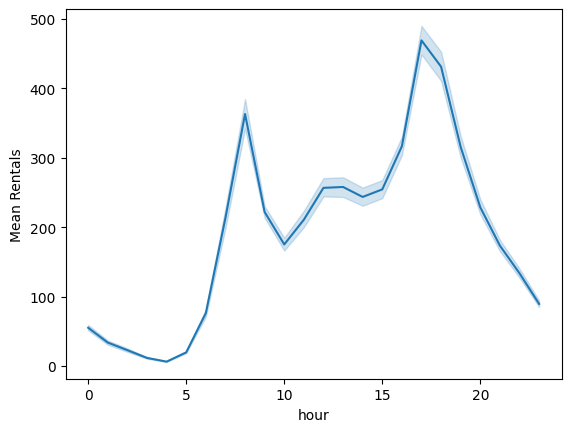

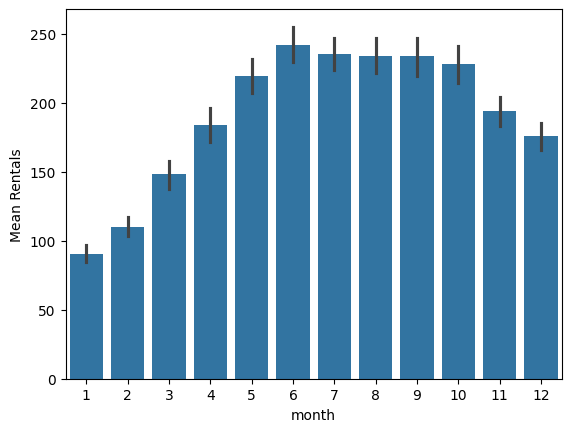

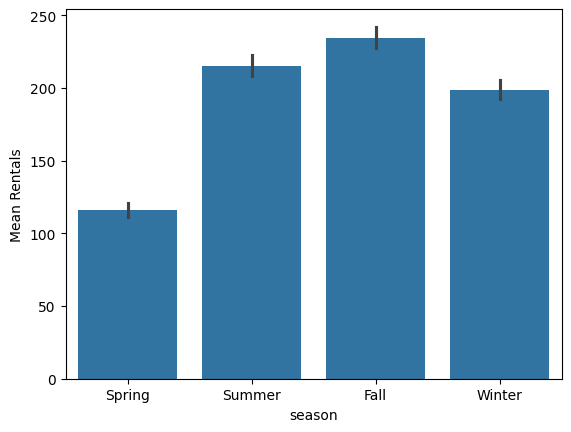

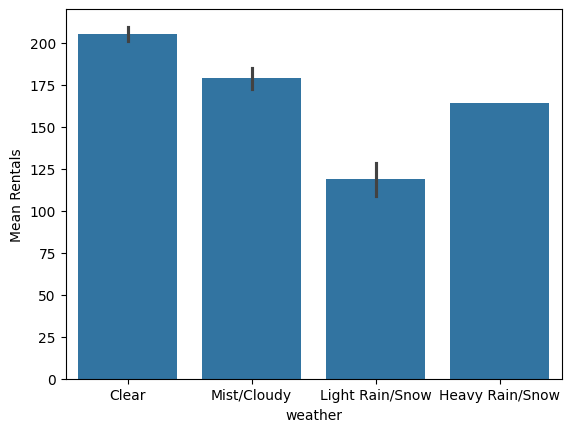

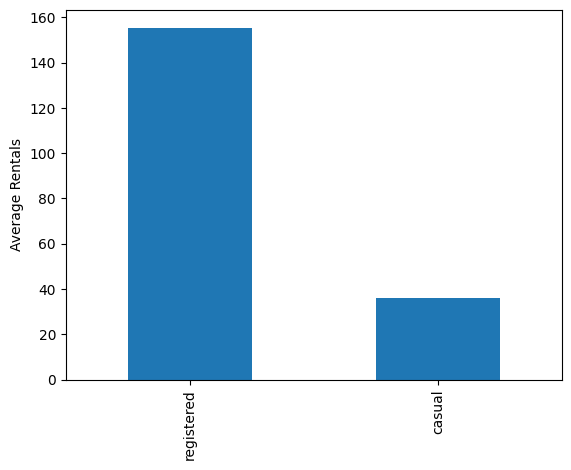

In [31]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Page config
st.set_page_config(page_title="DC Bike Rentals Dashboard", layout="wide")

# Title
st.title("🚲 Washington D.C. Bike Rentals Dashboard")

# Load data
@st.cache_data
def load_data():
    df = pd.read_csv("train.csv")
    df["datetime"] = pd.to_datetime(df["datetime"])
    df["year"] = df["datetime"].dt.year
    df["month"] = df["datetime"].dt.month
    df["hour"] = df["datetime"].dt.hour
    df["dayofweek"] = df["datetime"].dt.day_name()

    season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
    df["season"] = df["season"].map(season_map)

    weather_map = {
        1: "Clear",
        2: "Mist/Cloudy",
        3: "Light Rain/Snow",
        4: "Heavy Rain/Snow"
    }
    df["weather"] = df["weather"].map(weather_map)

    return df

df = load_data()

# ------------------ SIDEBAR FILTERS ------------------
st.sidebar.header("🔧 Filters")

year_option = st.sidebar.selectbox(
    "Select Year",
    options=["All", 2011, 2012]
)

working_day_option = st.sidebar.selectbox(
    "Working Day",
    options=["All", "Yes", "No"]
)

season_option = st.sidebar.multiselect(
    "Select Season",
    options=df["season"].unique(),
    default=df["season"].unique()
)

# Apply filters
filtered_df = df.copy()

if year_option != "All":
    filtered_df = filtered_df[filtered_df["year"] == year_option]

if working_day_option == "Yes":
    filtered_df = filtered_df[filtered_df["workingday"] == 1]
elif working_day_option == "No":
    filtered_df = filtered_df[filtered_df["workingday"] == 0]

filtered_df = filtered_df[filtered_df["season"].isin(season_option)]

# ------------------ PLOTS ------------------

st.subheader("📊 Key Insights")

col1, col2 = st.columns(2)

# 1️⃣ Mean rentals by hour
with col1:
    st.markdown("### Mean Rentals by Hour")
    fig, ax = plt.subplots()
    sns.lineplot(
        data=filtered_df,
        x="hour",
        y="count",
        estimator="mean",
        ax=ax
    )
    ax.set_ylabel("Mean Rentals")
    st.pyplot(fig)

# 2️⃣ Mean rentals by month
with col2:
    st.markdown("### Mean Rentals by Month")
    fig, ax = plt.subplots()
    sns.barplot(
        data=filtered_df,
        x="month",
        y="count",
        estimator="mean",
        ax=ax
    )
    ax.set_ylabel("Mean Rentals")
    st.pyplot(fig)

# 3️⃣ Mean rentals by season
st.markdown("### Mean Rentals by Season")
fig, ax = plt.subplots()
sns.barplot(
    data=filtered_df,
    x="season",
    y="count",
    estimator="mean",
    ax=ax
)
ax.set_ylabel("Mean Rentals")
st.pyplot(fig)

# 4️⃣ Mean rentals by weather
st.markdown("### Mean Rentals by Weather Condition")
fig, ax = plt.subplots()
sns.barplot(
    data=filtered_df,
    x="weather",
    y="count",
    estimator="mean",
    ax=ax
)
ax.set_ylabel("Mean Rentals")
st.pyplot(fig)

# 5️⃣ Registered vs Casual
st.markdown("### Registered vs Casual Rentals")
fig, ax = plt.subplots()
filtered_df[["registered", "casual"]].mean().plot(kind="bar", ax=ax)
ax.set_ylabel("Average Rentals")
st.pyplot(fig)

# Footer
st.markdown("___")
st.markdown("📌 **Built using Streamlit | Data Visualization Assignment 3.3**")

